# Introductory Numerical Methods for Simulating Dynamic Systems
This notebook comprises the exercises we will use for this lecture. If you are not familiar with Julia syntax, please review `basics.ipynb` in the same folder as this file.

## Preliminary Code
The cell below defines helper functions to assist with the exercises. Please run this cell be before proceeding below to the exercises.

In [90]:
using Plots, NLsolve

function plot_solution(ts, ys...; kwargs...)
    error("Unexpected solution format for plotting, it should be `ts, y1, y2, ...` where each input is a vector.")
end

function plot_solution(ts::Vector{<:Real}, ys::Vararg{Vector{<:Real}}; labels = nothing, marker_size = 3, kwargs...)
    @assert length(ys) >= 1 "Need to specify times and function values."
    if labels isa Nothing
        labels = ("y$i(t)" for i in 1:length(ys))
    end
    p = plot(ts, ys[1], marker = (:circle, marker_size), label = labels[1]; kwargs...)
    xlabel!("time (t)")
    for i in 2:length(ys)
        plot!(p, ts, ys[i], marker = (:circle, marker_size), label = labels[i])
    end
    return p
end

plot_solution (generic function with 2 methods)

## Exercise 1: Simple ODE Simulation via Explicit Euler
Solve the following ODE:
$$\begin{gathered}
\frac{d y(t)}{dt} = e^{-t} \\
y(0) = -1
\end{gathered}$$
for $t \in [0, 1]$ using $\Delta t=0.1$. Plot your result against the analytical solution (you also need to determine this).

Recall that the update rule for explicit Euler is:
$$\tilde{y}(t_{k+1}) = \tilde{y}(t_k) + f(y(t_k), t_k) \Delta t$$

### Plot the Analytical Solution
First, let's determine the analytical solution and plot it.

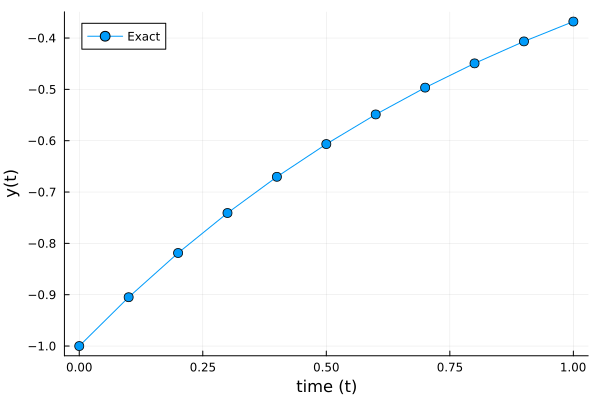

In [12]:
# Define parameters
Δt = 0.1
ts = collect(0:Δt:1)

# Declare the mathematical function of y(t)
y(t) = -exp(-t)

# Plot the result
plot_solution(ts, y.(ts); labels = ("Exact",), ylabel="y(t)")

### Compute the Approximate Solution using Explicit Euler
Now that let's compute the approximate solution using Euler's method. 

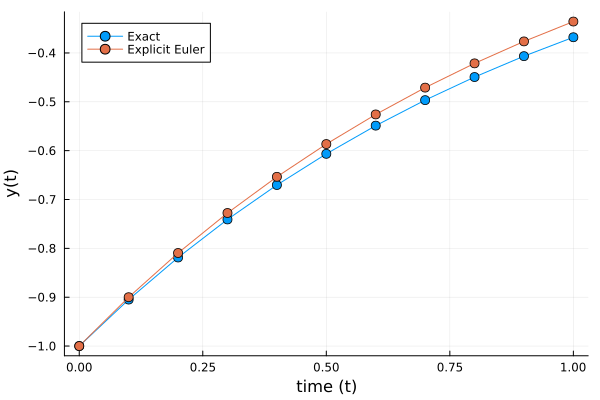

In [23]:
# Define parameters
y0 = -1
Δt = 0.1 # TODO try changing this
ts = collect(0:Δt:1)
num_steps = length(ts) - 1

# Define storage vector for y(t)
y_euler = zeros(length(ts))

# Fill in y_euler using explicit Euler
y_euler[1] = y0
for k = 1:num_steps
    y_euler[k + 1] = y_euler[k] + exp(-ts[k]) * Δt
end

# Plot the results
plot_solution(ts, y.(ts), y_euler; labels = ("Exact", "Explicit Euler"), ylabel="y(t)")

## Exercise 2: Simulate Coupled ODEs
Simulate the following system of ODEs:
$$\begin{gathered}
\frac{d x(t)}{dt} = -5x(t) + 5y(t) \\
\frac{d y(t)}{dt} = 14x(t) - 2y(t) \\
x(0)=y(0)=1 
\end{gathered}$$
for $t \in [0, 1]$ with $\Delta t = 0.1$. 

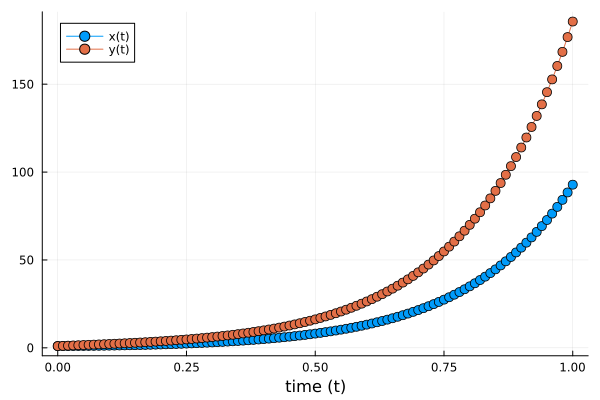

In [64]:
# Define parameters
x0 = 1
y0 = 1
Δt = 0.01
ts = collect(0:Δt:1)
num_steps = length(ts) - 1

# Define storage vectors for x(t) and y(t)
x_euler = zeros(length(ts))
y_euler = zeros(length(ts))

# Approximate x(t) and y(t) using explicit euler and fill in the storage vectors
x_euler[1] = x0
y_euler[1] = y0
for k in 1:num_steps
    x_euler[k+1] = x_euler[k] + (-5 * x_euler[k] + 5 * y_euler[k]) * Δt
    y_euler[k+1] = y_euler[k] + (14 * x_euler[k] - 2 * y_euler[k]) * Δt
end

# Plot the results
plot_solution(ts, x_euler, y_euler; labels = ("x(t)", "y(t)"))

### Exercise 3: Stability of Explicit Euler
Simulate the following:
$$\begin{gathered}
\frac{d y(t)}{dt} = -20y(t) \\
y(0) = 1
\end{gathered}$$
for $t \in [0, 1]$ with $\Delta t = 0.1$. Let's compare with the analytical solution as well.

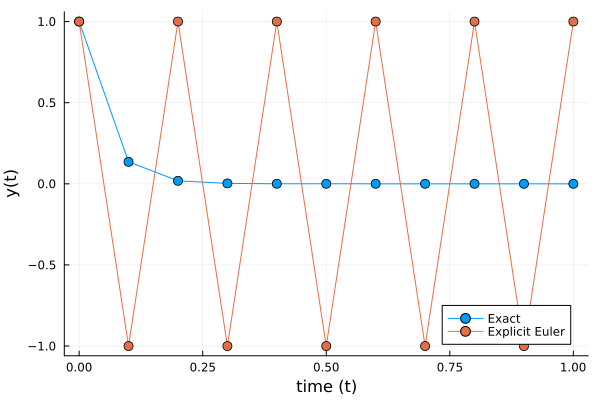

In [37]:
# Define parameters
y0 = 1
Δt = 0.1
ts = collect(0:Δt:1)
num_steps = length(ts) - 1

# Define storage vectors for y(t)
y_euler = zeros(length(ts))

# Define the mathematical function for y(t) (i.e., the analytical solution)
y(t) = exp(-20t)

# Do explicit euler and fill y_euler
y_euler[1] = y0
for k ∈ 1:num_steps
    y_euler[k + 1] = y_euler[k] + -20 * y_euler[k] * Δt
end

# Plot the solution 
plot_solution(ts, y.(ts), y_euler; labels = ("Exact", "Explicit Euler"), ylabel="y(t)")

### Exercise 4: Stability with Implicit Euler
Redo Exercise 3 using implicit Euler.

Here we will need to solve a nonlinear equation. For a general equation $g(y) = 0$ this can be accomplished in Julia via the syntax:
```julia
# Define residual function that populates a vector r (the resdiuals of each equation) and variables y 
function residual!(r, y)
    r[1] = y[1]^2 # let g(y) = y^2
end
y_opt = nlsolve(residual!, [0.0], autodiff = :forward).zero[1] # here [0.0] is the initial guess
```

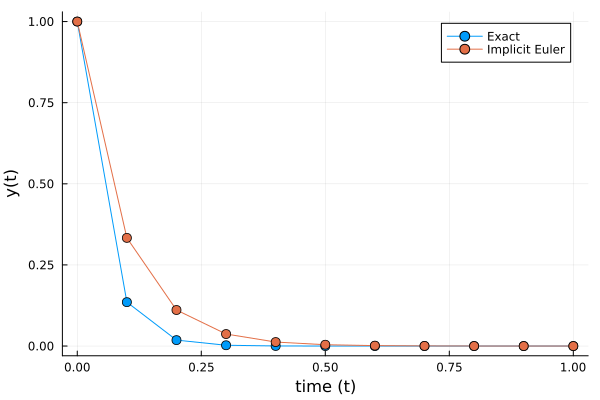

In [55]:
# Define parameters
y0 = 1
Δt = 0.1
ts = collect(0:Δt:1)
num_steps = length(ts) - 1

# Define storage vectors for y(t)
y_euler = zeros(length(ts))

# Define the mathematical function for y(t) (i.e., the analytical solution)
y(t) = exp(-20t)

# Do explicit euler and fill y_euler
y_euler[1] = y0
for k ∈ 1:num_steps
    function residual!(r, y)
        r[1] = y_euler[k] + -20 * y[1] * Δt - y[1]
    end
    y_euler[k + 1] = nlsolve(residual!, [y_euler[k]], autodiff = :forward).zero[1]
end

# Plot the solution 
plot_solution(ts, y.(ts), y_euler; labels = ("Exact", "Implicit Euler"), ylabel="y(t)")

## Exercise 5: Simulate a System of ODEs using Implicit Euler
Repeat Exercise 4, but now use implicit Euler.

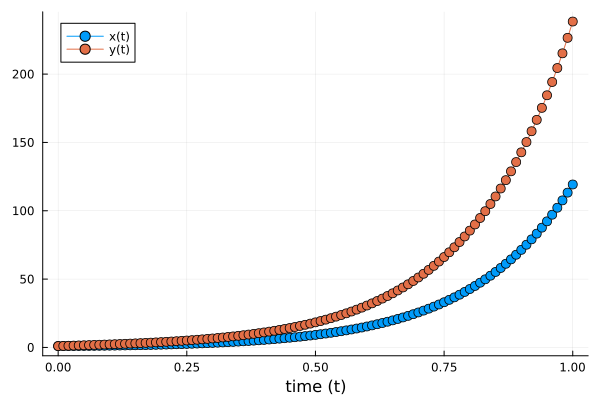

In [65]:
# Define parameters
x0 = 1
y0 = 1
Δt = 0.01
ts = collect(0:Δt:1)
num_steps = length(ts) - 1

# Define storage vectors for x(t) and y(t)
x_euler = zeros(length(ts))
y_euler = zeros(length(ts))

# Approximate x(t) and y(t) using explicit euler and fill in the storage vectors
x_euler[1] = x0
y_euler[1] = y0
for k in 1:num_steps
    function residual!(r, y)
        r[1] = x_euler[k] + (-5 * y[1] + 5 * y[2]) * Δt - y[1]
        r[2] = y_euler[k] + (14 * y[1] - 2 * y[2]) * Δt - y[2]
    end
    x_euler[k + 1], y_euler[k + 1] = nlsolve(residual!, [x_euler[k], y_euler[k]], autodiff = :forward).zero
end

# Plot the results
plot_solution(ts, x_euler, y_euler; labels = ("x(t)", "y(t)"))

## Exercise 6: Simulate Reaction Network in Batch Reactor
Simulate the response of the reaction system:
$$\begin{gathered}
\text{A} \rightleftharpoons \text{B} \\
\text{A} \rightleftharpoons \text{C}
\end{gathered}$$
for $t \in [0, 1]$ using implicit Euler. The ODEs are given by:
$$\begin{aligned}
&\frac{d \textbf{c}(t)}{dt} = \gamma \textbf{r}(\textbf{c}, t) \\
&\textbf{c}(0) = c_{i, 0}
\end{aligned}$$
where we have:
$$\textbf{r}(\textbf{c}, t) = \textbf{k}^T(t)\textbf{c}(t)$$
and we have:
$$k_{ij}(t) = A_{ij} \exp\Bigg(\frac{-E_{a,ij}}{RT(t)}\Bigg)$$
The needed parameters are given below.

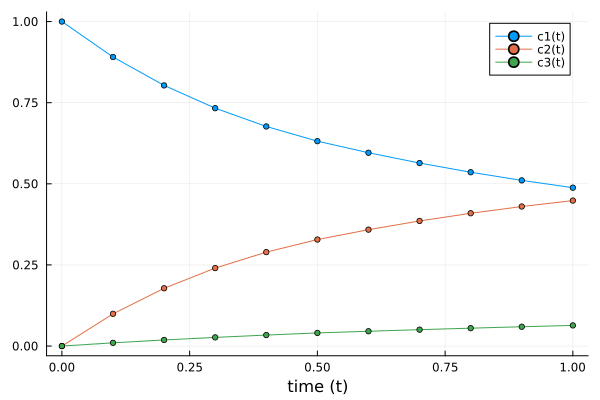

In [92]:
# Define the parameters
R = 1.987
A = [3.6362e6 190.6879; -2.5212e16 0; 0 -8.7409e24]
Ea = [10000. 5000.; 25000. 0.; 0. 40000.]
γ = [-1 -1; 1 0; 0 1]
c0 = [1.; 0.; 0.]
T(t) = t < 0.5 ? 333 : 325
Δt = 0.1 # TODO put value here
ts = collect(0:Δt:1)
num_steps = length(ts) - 1

# Define collection array c_euler
c_euler = zeros(length(ts), 3) # time by cs

# Implement explicit Euler and fill c
c_euler[1, :] = c0
for k in 1:num_steps
    ks = A .* exp.(-Ea / R / T(ts[k]))
    rate = ks' * c_euler[k, :] # β is always 1 and is unnecessary
    c_euler[k + 1, :] = c_euler[k, :] + γ * rate * Δt
end

#  Plot the solution
plot_solution(ts, c_euler[:, 1], c_euler[:, 2], c_euler[:, 3]; labels = ("c1(t)", "c2(t)", "c3(t)"))